In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dengue.csv')

In [3]:
df

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
df.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [5]:
df.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [40]:
df['Month'] = df['Month'].astype('category')
df['Region'] = df['Region'].astype('category')

In [7]:
df.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<hr>

<h1>Q1: Which region recorded the highest number of dengue cases? with visulaization?</h1>

In [8]:
# Group by region and sum dengue cases
region_cases = df.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

# Identify the region with the highest cases
top_region = region_cases.idxmax()
top_cases = region_cases.max()

print("Region with the highest dengue cases:", top_region)
print("Total dengue cases:", top_cases)

Region with the highest dengue cases: Region IV-A
Total dengue cases: 163029


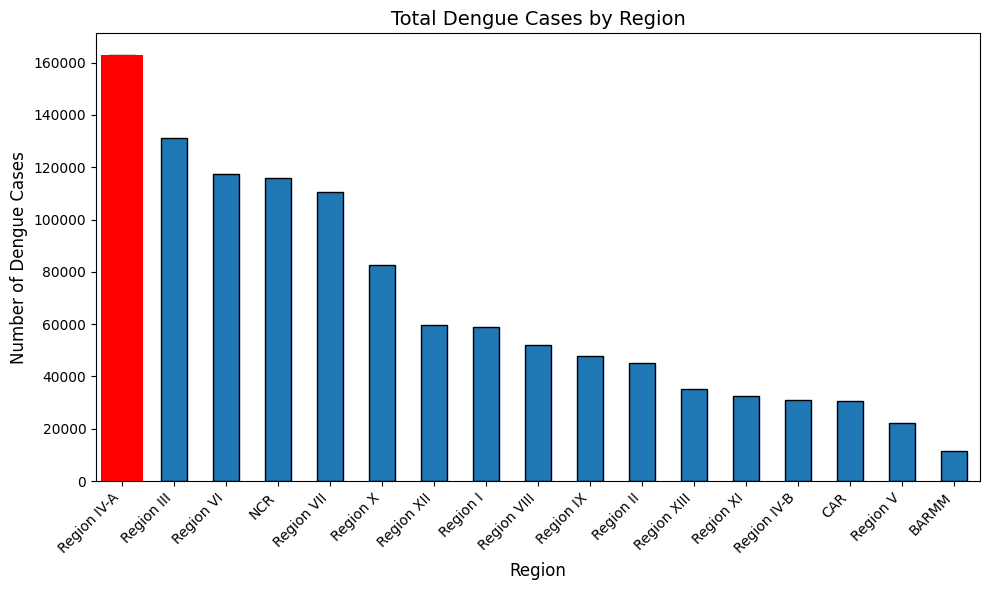

In [9]:
# Visualization
plt.figure(figsize=(10,6))
region_cases.plot(kind='bar', edgecolor='black')

plt.title("Total Dengue Cases by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Dengue Cases", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Highlight the region with the most cases
plt.bar(top_region, top_cases, color='red')

plt.show()

<h3>INSIGHT#1: Region IV-A has one of the largest populated areas in the Philippines, especially in provinces such as Cavite, Laguna, and Rizal. High population density increases the likelihood of mosquito and human contact, which urbanization can often leads to poor drainage, stagnant water, and improper waste disposal. all of these can contribute in breeding or creating alot of mosquitoes.

Reference: Department of Health; PSA, 2020 Population Census</h3>

<h3>INSIGHT#2: This region's tropical climate, characterized by frequent rainfall and high humidity, which can provide a favorable conditions for mosquito breeding throughout the year. Combined with human behaviors like water storage and improper waste management during rainy seasons, these environmental factors contribute to the persistent and recurring dengue outbreaks in Region IV-A.</h3>

<hr>
<H1>Q2: Which region has the highest moratility/death?</H1>

In [10]:
region_deaths = df.groupby("Region")["Dengue_Deaths"].sum().sort_values(ascending=False)

# Identify the region with the highest deaths
top_region = region_deaths.idxmax()
top_deaths = region_deaths.max()

print("Region with the highest dengue deaths:", top_region)
print("Total dengue deaths:", top_deaths)

Region with the highest dengue deaths: NCR
Total dengue deaths: 4008


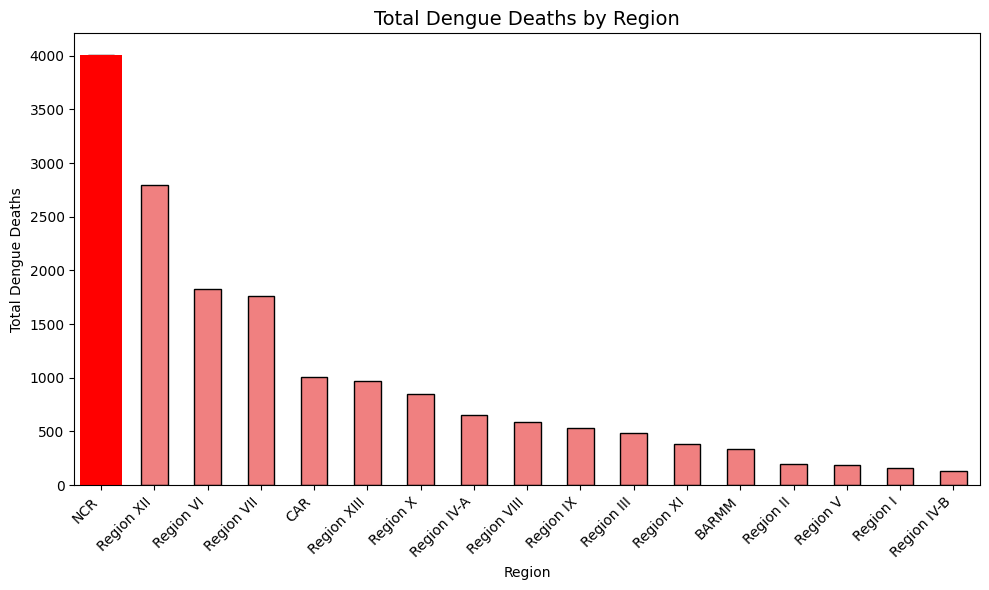

In [11]:
# Plot the chart
plt.figure(figsize=(10,6))
region_deaths.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title("Total Dengue Deaths by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Dengue Deaths")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Highlight the region with the highest mortality
plt.bar(top_region, top_deaths, color='red')

plt.show()

<h3>INSIGHT#3: Despite having fewer total dengue cases than Region IV-A, NCR often records the highest number of dengue deaths. This occurs because of its extremely dense population, overcrowded communities, and limited hospital capacity relative to demand of patients. NCR hospitals also receive referrals from nearby provinces, which can lead to higher recorded deaths and delayed treatment for severe cases.</h3>

<hr>
<h1>Q3: Which year had the most dengue cases?</h1>

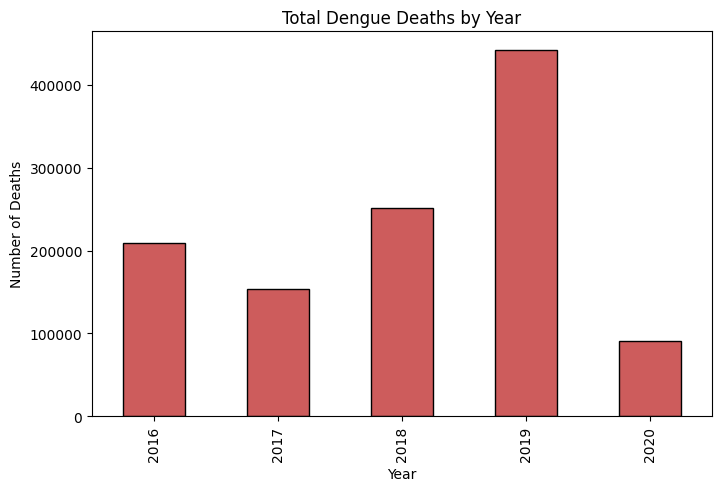

In [12]:
yearly_cases = df.groupby("Year")["Dengue_Cases"].sum()

plt.figure(figsize=(8,5))
yearly_cases.plot(kind='bar', color='indianred', edgecolor='black')
plt.title("Total Dengue Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()


<H3>INSIGHT#4: The 2019 dengue outbreak was declared a national epidemic by the DOH due to a significant rise in infections and deaths, especially among children. The surge was linked to changing dengue virus serotypes, which led to widespread susceptibility among the population.

Reference:

Department of Health (DOH). (2019). Dengue Epidemic Situation Update. doh.gov.ph

World Health Organization (WHO Philippines). (2020). Dengue Situation Report – Philippines. who.int/philippines</H3>

<h3>INSIGHT#5: In 2019, the Philippines experienced an unprecedented dengue outbreak, with more than 420,000 reported cases and over 1,600 deaths according to the Department of Health (DOH) and World Health Organization (WHO).
This year marked the worst dengue epidemic in the country’s history.</h3>

<HR>
<h1>Q4:  Which year had the most dengue deaths?</h1>

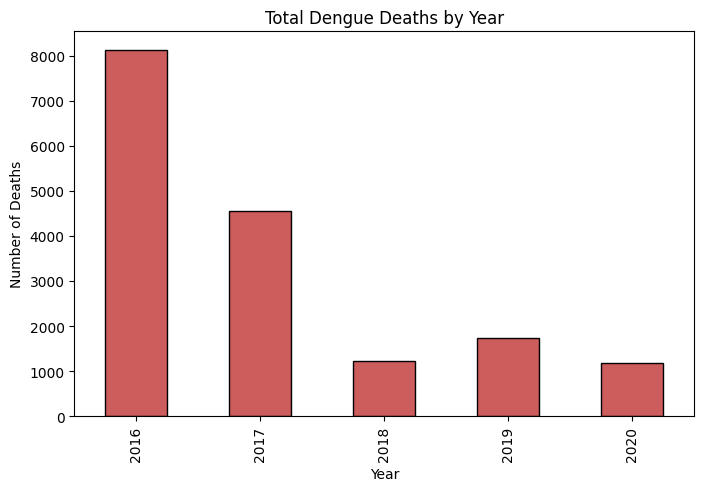

In [13]:
yearly_deaths = df.groupby("Year")["Dengue_Deaths"].sum()

plt.figure(figsize=(8,5))
yearly_deaths.plot(kind='bar', color='indianred', edgecolor='black')
plt.title("Total Dengue Deaths by Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()

<h3>INSIGHT#6: In 2016, many regions lacked early detection, information or awareness about dengue. As a result, many patients come to hospital care too late, leading to a higher fatality rate despite moderate case numbers. The National Capital Region (NCR) and Region IV-A reported some of the highest deaths due to hospital congestion and delays in treatment.</h3>

<h3>INSIGHT#7: In 2016 philipphines experienced heavy rainfall and flooding due to strong monsoons, which increased mosquito breeding.
At the same time, local health units were still adjusting to changes in dengue prevention programs, and vector control measures were less effective compared to later years.</h3>

<H1>Q5: Which month has the highest case of dengue?</H1>

In [14]:
peak_month = df.groupby('Month')['Dengue_Cases'].mean().idxmax()
avg_cases = df.groupby('Month')['Dengue_Cases'].mean()
print("Month with highest average dengue cases:", peak_month)

Month with highest average dengue cases: August


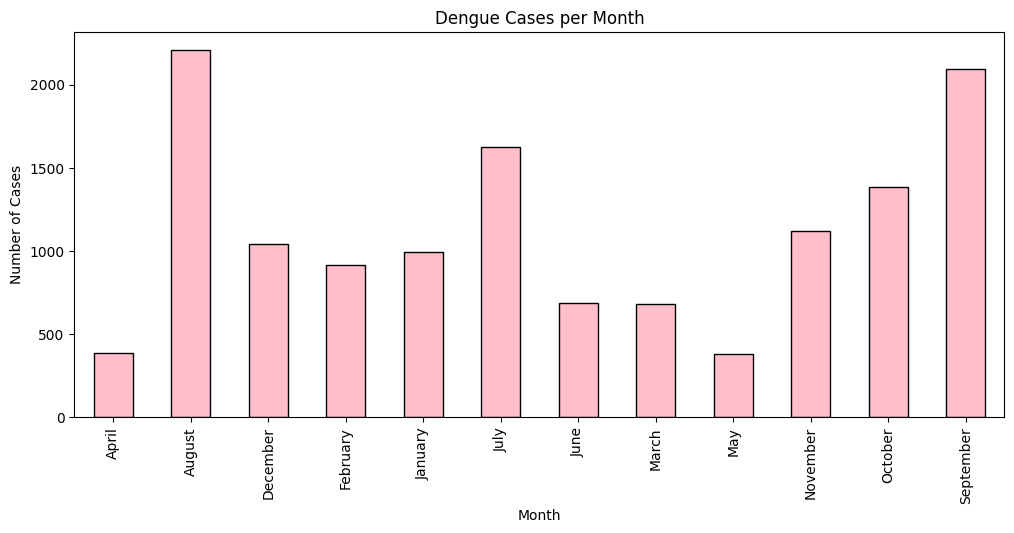

In [15]:
plt.figure(figsize=(12,5))
avg_cases.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Dengue Cases per Month")
plt.xlabel("Month")
plt.ylabel("Number of Cases")
plt.show()

<h3>INSIGHT#8: The chart shows that dengue cases begin to rise around June, peaking in August, which is the month where rainfall begins. This suggests a positive correlation between rainfall and dengue incidence. Rain creates stagnant water, providing ideal breeding sites for mosquitoes which is the primary carrier of dengue.</H3>

<h3>INSIGHT#9: As we can see above, summer isn't likely to have a highest cases but just an average case of dengue. The high peaked is during august and september. But even December is also a cold and rainy day it still not that high case. So it means that season is around july - october.</h3>

<H1>Q5: Which month has the highest death of dengue?</H1>

In [16]:
peak_month = df.groupby('Month')['Dengue_Deaths'].mean().idxmax()
avg_cases = df.groupby('Month')['Dengue_Deaths'].mean()
print("Month with highest average dengue death:", peak_month)

Month with highest average dengue death: October


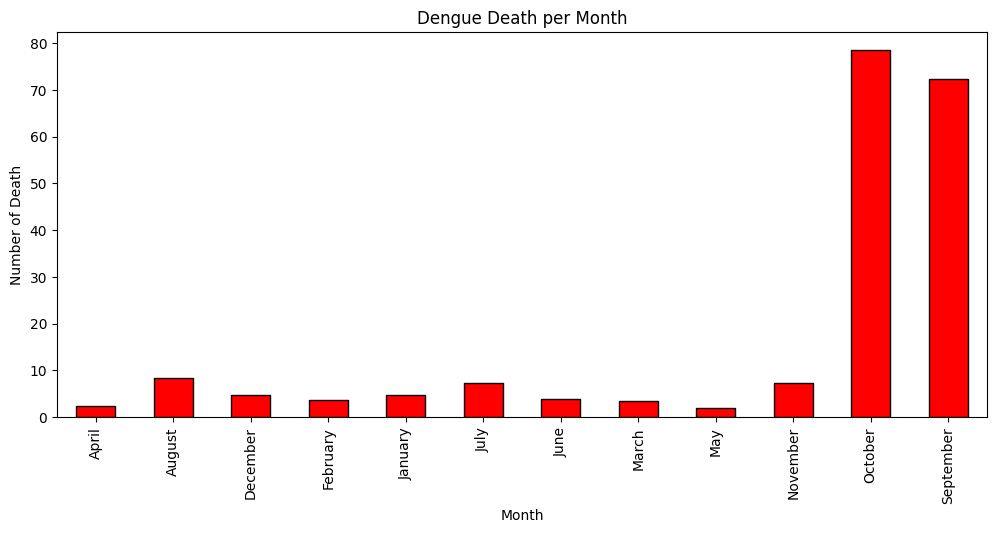

In [17]:
plt.figure(figsize=(12,5))
avg_cases.plot(kind='bar', color='red', edgecolor='black')
plt.title("Dengue Death per Month")
plt.xlabel("Month")
plt.ylabel("Number of Death")
plt.show()

<h3>INSIGHT#10: The chart shows that dengue death begin to rise around Serptember, peaking in October, which means even there's so many cases of dengue in august it doesn't mean that it is also the month with a high death cases of dengue.</H3>

In [18]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.linear_model import LinearRegression

In [22]:
df['Date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df = df.sort_values('Date')

In [41]:
df.dtypes

Month                  category
Year                      int64
Region                 category
Dengue_Cases              int64
Dengue_Deaths             int64
Date             datetime64[ns]
Island_Group           category
dtype: object

In [38]:
region_to_island = {
    'Region I': 'Luzon',
    'Region II': 'Luzon',
    'Region III': 'Luzon',
    'Region IV-A': 'Luzon',
    'Region IV-B': 'Luzon',
    'Region V': 'Luzon',
    'Region VI': 'Visayas',
    'Region VII': 'Visayas',
    'Region VIII': 'Visayas',
    'Region IX': 'Mindanao',
    'Region X': 'Mindanao',
    'Region XI': 'Mindanao',
    'Region XII': 'Mindanao',
    'Region XIII': 'Mindanao',
    'CAR': 'Luzon',
    'NCR': 'Luzon',
    'BARMM': 'Mindanao'
}

df['Island_Group'] = df['Region'].map(region_to_island)
df['Island_Group'] = df['Island_Group'].astype('category')

<h1>Q6: Which island group (Luzon, Visayas, or Mindanao) reports the highest dengue cases overall?</h1>

In [46]:
island_cases = df.groupby('Island_Group')['Dengue_Cases'].sum().reset_index()
island_cases = island_cases.sort_values('Dengue_Cases', ascending=False)
print(island_cases)

  Island_Group  Dengue_Cases
0        Luzon        597864
2      Visayas        280189
1     Mindanao        269372


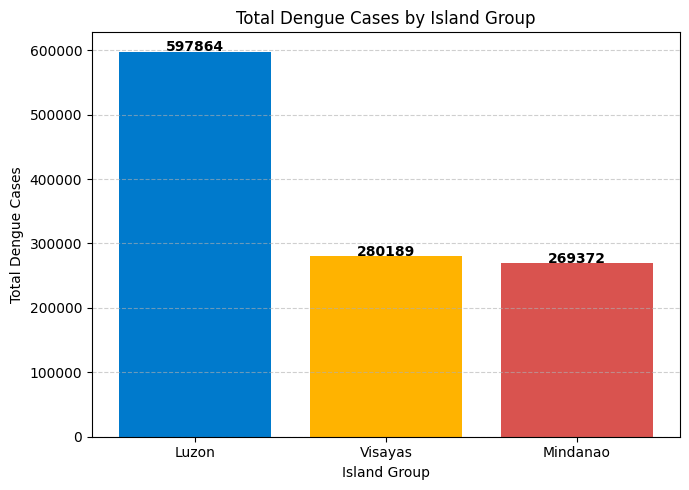

In [47]:
plt.figure(figsize=(7, 5))
plt.bar(island_cases['Island_Group'], island_cases['Dengue_Cases'], color=['#007acc', '#ffb300', '#d9534f'])
plt.title('Total Dengue Cases by Island Group')
plt.xlabel('Island Group')
plt.ylabel('Total Dengue Cases')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, v in enumerate(island_cases['Dengue_Cases']):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

<H3>INSIGHT#11: Luzon records the highest number of dengue cases overall, reaching nearly 600,000 total cases, which is more than double the counts from Visayas and Mindanao. This suggests that dengue transmission is in highly urbanized and densely populated areas like those in Luzon.</H3>

<H3>INSIGHT#12: Visayas and Mindanao almost a show similar dengue case totals, with only a small difference between around 10,000 cases. This indicates that dengue prevalence across these two island groups is relatively balanced, possibly due to comparable climate and environmental conditions favorable for mosquito breeding.</H3>

<hr>
<h1>Q7: How does the dengue death rate (deaths ÷ cases) vary with year?</h1>

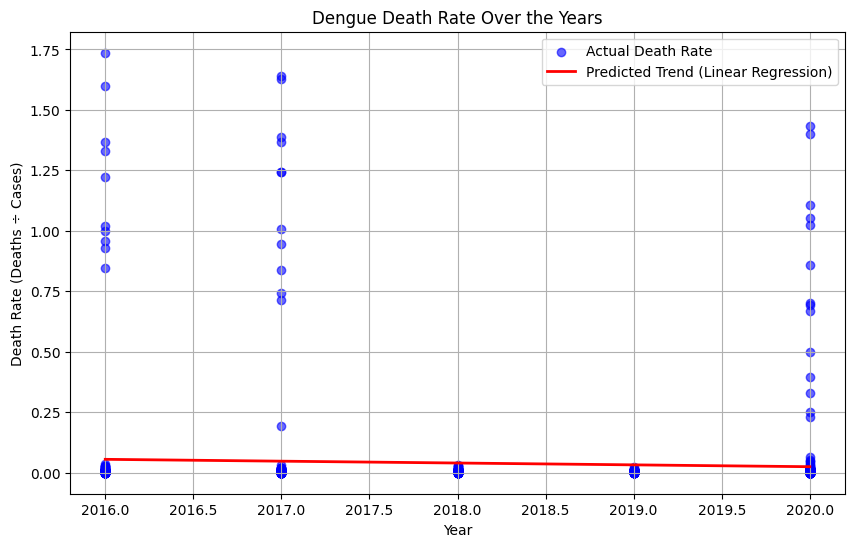

In [56]:
# Compute dengue death rate (avoid division by zero)
df['Death_Rate'] = df['Dengue_Deaths'] / df['Dengue_Cases']
df['Death_Rate'] = df['Death_Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Prepare features (Year) and target (Death_Rate)
X = df[['Year']]
y = df['Death_Rate']

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict death rate
df['Predicted_Death_Rate'] = model.predict(X)

# Visualization
plt.figure(figsize=(10,6))
plt.scatter(df['Year'], df['Death_Rate'], color='blue', alpha=0.6, label='Actual Death Rate')
plt.plot(df['Year'], df['Predicted_Death_Rate'], color='red', linewidth=2, label='Predicted Trend (Linear Regression)')

plt.title('Dengue Death Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Death Rate (Deaths ÷ Cases)')
plt.legend()
plt.grid(True)
plt.show()


<h3>INSIGHT#13: The dengue death rate remains very low and stable across the years.
The red regression line stays nearly flat near zero, meaning the overall fatality rate hasn’t significantly changed from 2016 to 2020. This suggests that while cases may move, the proportion of deaths relative to cases stays consistent which is a sign of steady medical response and public health management.</h3>

<h3>INSIGHT#14: A few outliers show unusually high death rates in certain years.
Some blue dots which is the actual data points rise far above the trend line, especially around 2016–2017. These represent months or regions where deaths spiked despite relatively few cases, possibly due to localized outbreaks, reporting differences, or delayed treatment.</h1>

<hr>
<h1>Q8: Which areas show both high dengue cases and high death rates?</h1>

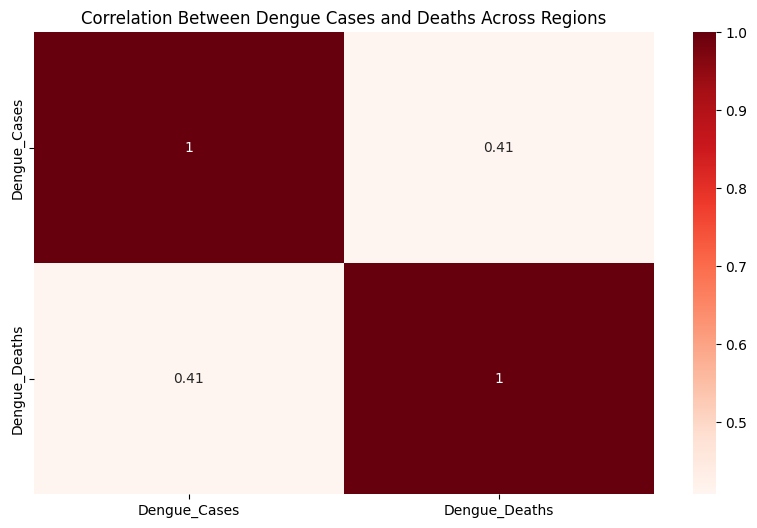

Top 5 Regions with High Dengue Cases and Deaths:
         Region  Dengue_Cases  Dengue_Deaths
6   Region IV-A   2717.150000      10.866667
5    Region III   2184.400000       8.033333
10    Region VI   1958.716667      30.416667
2           NCR   1932.766667      66.800000
11   Region VII   1844.716667      29.333333


In [61]:
region_summary = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean().reset_index()
plt.figure(figsize=(10,6))
sns.heatmap(region_summary[['Dengue_Cases', 'Dengue_Deaths']].corr(), annot=True, cmap='Reds')
plt.title('Correlation Between Dengue Cases and Deaths Across Regions')
plt.show()
top_hotspots = region_summary.sort_values(by=['Dengue_Cases', 'Dengue_Deaths'], ascending=False).head(5)
print("Top 5 Regions with High Dengue Cases and Deaths:")
print(top_hotspots)


<h3>INSIGHT#15: Moderate Link Between Cases and Deaths (0.41 Correlation). There’s a moderate positive correlation between dengue cases and deaths — meaning regions with more dengue cases often have more deaths, but not always. This suggests other factors like healthcare and prevention also affect fatality rates.</h3>

<h3>INSIGHT#16: Region IV-A Leads in Cases, NCR Leads in Deaths. Region IV-A recorded the most dengue cases, while NCR had the highest number of deaths. This shows that even areas with fewer cases can still experience higher fatalities, possibly due to delayed treatment or more severe outbreaks.</h3>

<h3>INSIGHT#17: Luzon Regions Are the Main Hotspots of dengue cases. Most top regions with high dengue cases are located in Luzon (Regions IV-A, III, NCR), showing dengue outbreaks are more concentrated in densely populated and urbanized areas.</h3>